In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from itertools import permutations, combinations
from math import comb
import numpy as np
import timeit
import sys
sys.path.insert(0, '/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so')

import graph_func as gf
from timeit import default_timer as timer

print(gf.__file__)
print(gf.filtrate.__doc__)

/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so
filtrate(A: numpy.ndarray[numpy.float64], n: int, threads: int) -> numpy.ndarray[numpy.float64]

filter complex



In [23]:
def subsequences(seq):
    return [[list(subseq) for subseq in combinations(seq, sublen)] for sublen in range(2, len(seq)+1)]

def pairs(seq):
    return [seq[i:i+2] for i in range(len(seq)-1)]

def f(A, simplex, p=np.inf):

    fs = []
    for seq_p in permutations(simplex):

        ds = np.zeros(0)
        for dim, items in enumerate(subsequences(seq_p), start=1):
            for item in items:
                vec = A[(*np.array(pairs(item)).T,)]
                ds = np.concatenate([ds, [np.linalg.norm(vec, p)]])
        fs.append(np.max(ds))

    return np.min(fs)

In [13]:
n = 20
X = np.random.normal(size=(n, 2))
A = squareform(pdist(X))
X.shape, A.shape

((20, 2), (20, 20))

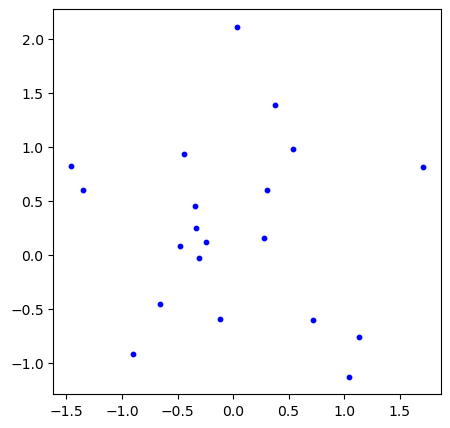

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], s=10, c="b")
plt.show()

In [25]:
start = timeit.timeit()

es_ = np.zeros((comb(n, 2), 3))

start = timeit.timeit()

for i, simplex in enumerate(combinations(range(n), 2)):
    es_[i,0] = f(A, simplex, 1)
    es_[i,1] = f(A, simplex, 2)
    es_[i,2] = f(A, simplex, np.inf)

es = gf.filtrate(A, 2, 1)
# ts = gf.filtrate(A, 3, 1)

end = timeit.timeit()

print(end - start)
es - es_

-0.004711976998805767


array([[ 0.00000000e+00, -2.78215888e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.11853607e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.06810806e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.36055578e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.99821757e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.58113030e+00,  0.00000000e+00],
       [ 0.00000000e+00, -8.88212835e-01,  0.00000000e+00],
       [ 0.00000000e+00, -8.10186211e-01,  0.00000000e+00],
       [ 0.00000000e+00, -2.03887757e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.94921168e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.82657239e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.68788960e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.38549503e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.61998829e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.16432044e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.64270522e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.07281418e+00

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_1285003/1003228789.py:2: SyntaxWarning: invalid escape sequence '\i'
  for j, title in [(0, "p=1"), (1, "p=2"), (2, "p=$\infty$")]:


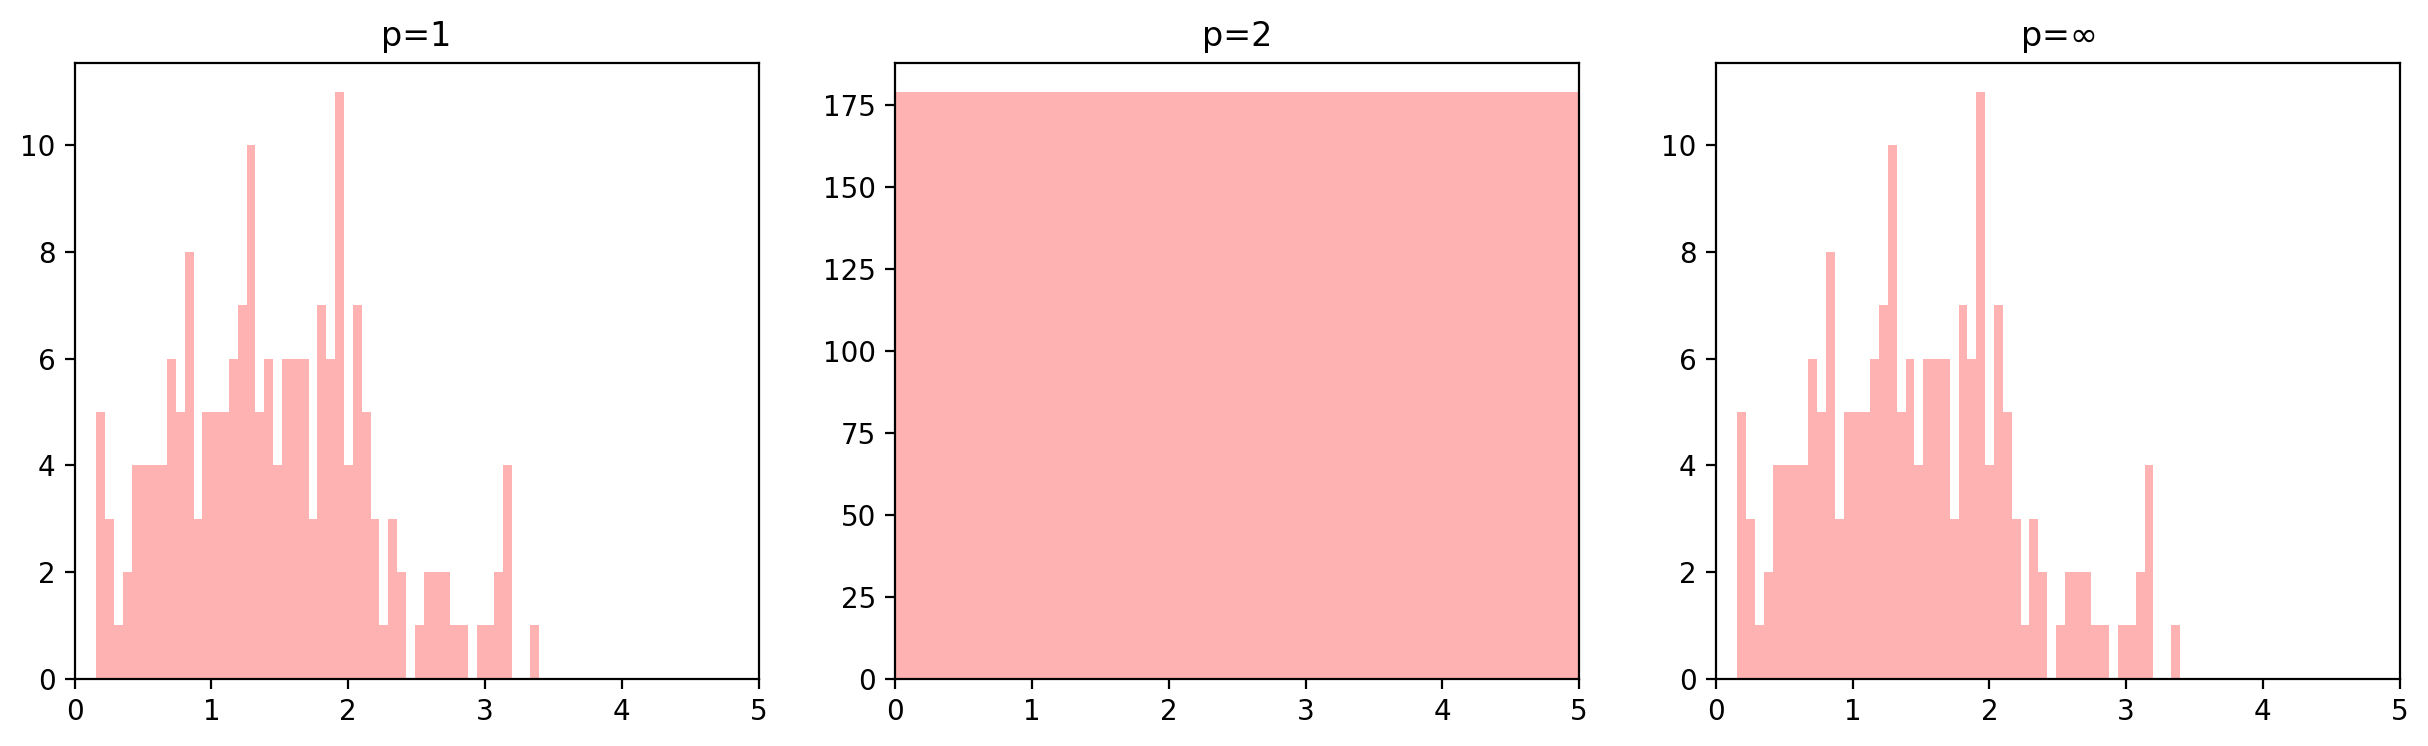

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 4), dpi=200)
for j, title in [(0, "p=1"), (1, "p=2"), (2, "p=$\infty$")]:
    ax[j].set_xlim(0, 5)
    ax[j].set_title(title)
    ax[j].hist(es[:,j], 50, color="r", alpha=0.3)
    # ax[j].hist(ts[:,j], 50, color="b", alpha=0.3)
plt.show()